In [ ]:
"""
고객은 상품 구매 시, 개인의 취향 및 필요에 따라 각기 구분되는 소비패턴을 보임.
고객의 과거 상품 구매 이력을 통해 소비패턴을 발견하여 미래 소비를 예측하고자 하는 시도는 산업 전반에서 이루어져 왔음.
고객의 미래 소비를 예측하고, 개인화된 제안을 하는 것에 역량을 집중하여 성공한 기업들로 구글, 넷플릭스 등이 있음.
한편, 온라인 커머스에서 고객이 상품을 구매할 때에, 하나 이상의 여러 상품을 한 주문서에 담아서 주문하는 것이 일반적임.
고객이 주문서에 상품을 담을 때에, 과거 이력을 통해 고객이 재구매 할만한 상품을 제안하여 고객 경험을 제고할 수 있음.
본 대회의 주제는 온라인 커머스 상품 제안이며, 현재 고객별 재구매율이 높은 상품을 제안하기 위해 다양한 분석을 시도하고 우수한 예측 결과를 도출하는 것을 목표로 함.


본 대회를 위한 데이터 세트는 시간에 따른 고객별 구매 내역에 관련된 정보로 구성됨.
과거 구매 내역을 통해 소비패턴을 발견하고 현재 구매 중인 상품 ID를 예측해야 함.
데이터 세트는 100개 상품에 대한 10,000명 고객의 상품 구매 관련 정보로 구성 됨.
각 고객별 구매 내역들에는 한 번의 구매 내역 안에 여러 상품 정보가 담겨 있을 수 있으며, 구매 요일/시각, 상품을 담은 순서, 재구매 여부 등 다양한 정보가 포함되어 있음.
test_x_current 테이블의 각 상품 구매 내역(row)에 대한 상품 ID를 예측한 test_y.csv를 생성

products_info 100개 상품에 대한 정보 (id, 이름, 분류명, 담당부서명 등)
train_x_past  5,859명 고객들의 과거 구매 이력
train_x_current 상품 ID를 제외한 5,859명 고객들의 현재 구매 정보
train_y 5,859명 고객들의 현재 주문 정보에 대한 상품 ID
test_x_past 4,141명 고객들의 과거 구매 이력
test_x_current 상품 ID를 제외한 4,141명 고객들이 현재 구매 정보

"""

In [1]:
# import 
from jbfg.pandas_utils import *
import os
import numpy as np
import calendar
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import missingno as msno

color = sns.color_palette()
%matplotlib inline

In [2]:
# 데이터 가져오기
query = "select * from l2_kjbk_extnl.products_info"
query1 = "select * from l2_kjbk_extnl.train_x_past"
query2 = "select * from l2_kjbk_extnl.train_x_current"
query3 = "select * from l2_kjbk_extnl.train_y"
#query4 = "select * from l2_kjbk_extnl.test_x_past"
#query5 = "select * from l2_kjbk_extnl.test_x_current"

df_products_info = get_df(query)
df_train_x_past = get_df(query1)
df_train_x_current = get_df(query2)
df_train_y = get_df(query3)

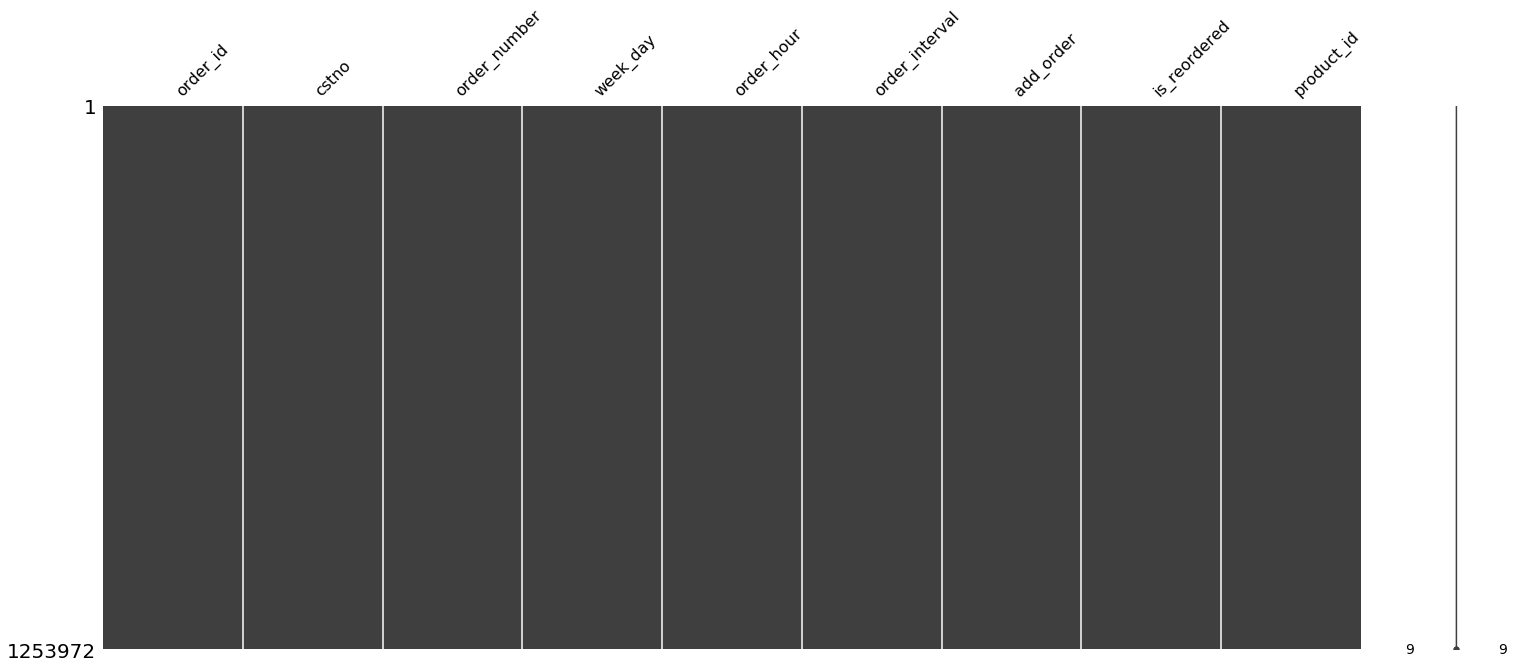

In [3]:
# 데이터 df_train_x_past 탐색 결측치 확인
#df_train_x_past.isnull().sum()
msno.matrix(df_train_x_past)
plt.show()


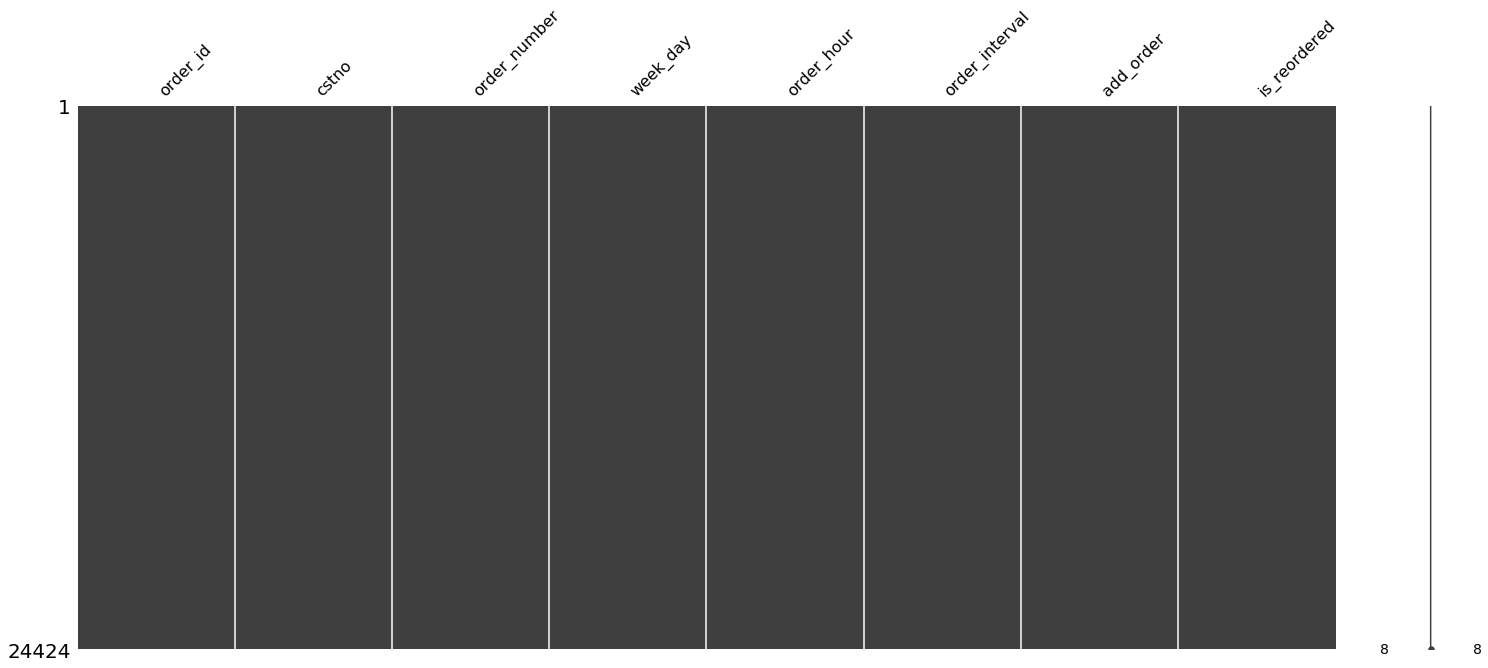

In [4]:
# 데이터 df_train_x_current 탐색 결측치 확인
#df_train_x_current.isnull().sum()
msno.matrix(df_train_x_current)
plt.show()

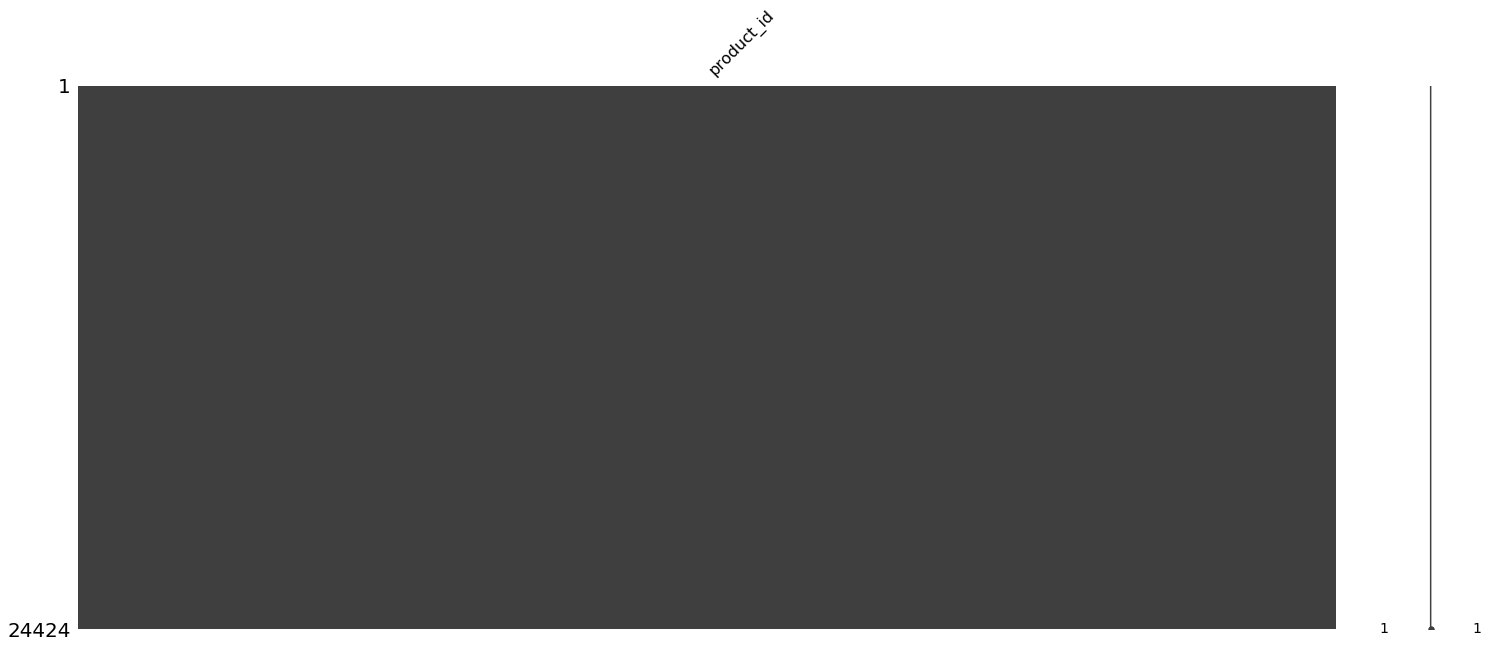

In [5]:
# 데이터 df_train_y 탐색 결측치 확인
#df_train_y.isnull().sum()
msno.matrix(df_train_y)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


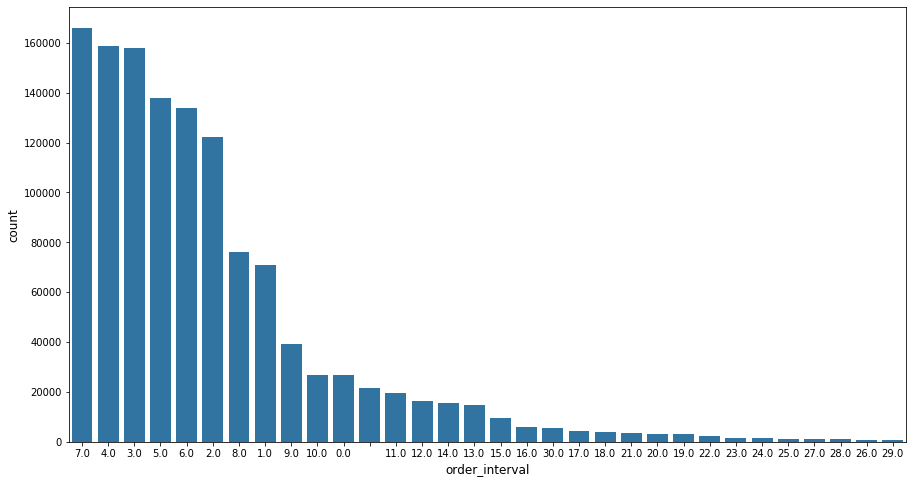

In [6]:
# df_train_x_past order_interbal 데이터 탐색
order_interbal = df_train_x_past.order_interval.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(order_interbal.index, order_interbal.values, alpha = 1, color=color[0])
plt.ylabel('count', fontsize=12)
plt.xlabel('order_interval', fontsize=12)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


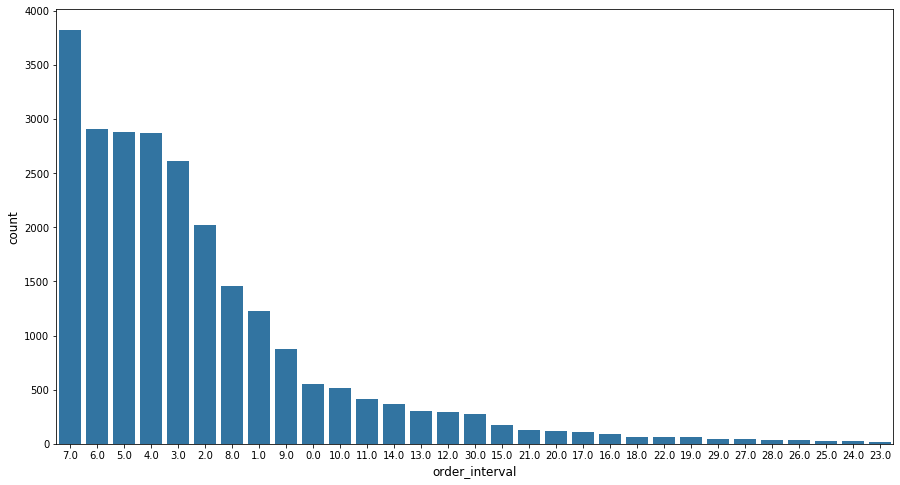

In [7]:
# df_train_x_current order_interbal 데이터 탐색
order_interbal_1 = df_train_x_current.order_interval.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(order_interbal_1.index, order_interbal_1.values, alpha = 1, color=color[0])
plt.ylabel('count', fontsize=12)
plt.xlabel('order_interval', fontsize=12)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


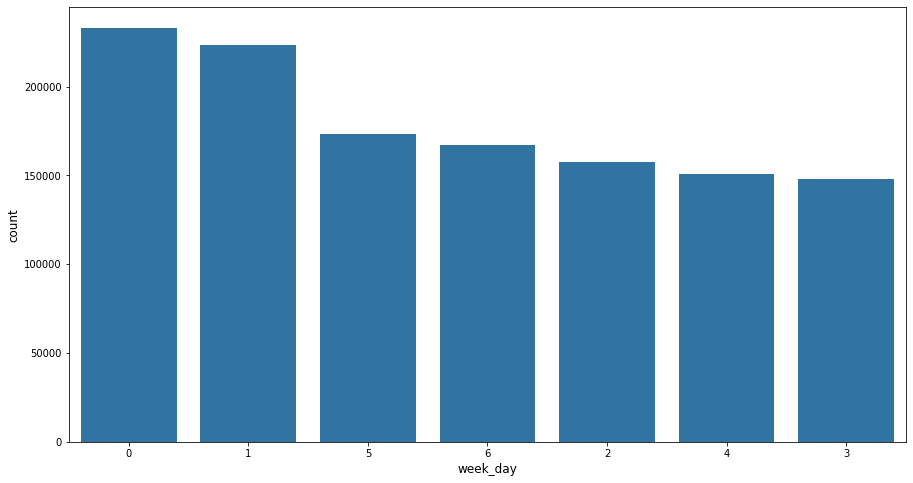

In [8]:
# df_train_x_past week_day 데이터 탐색
week_day_cnt = df_train_x_past.week_day.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(week_day_cnt.index, week_day_cnt.values, alpha = 1, color=color[0])
#sns.barplot(week_day_cnt.index, week_day_cnt.values, alpha = 1)
plt.ylabel('count', fontsize=12)
plt.xlabel('week_day', fontsize=12)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


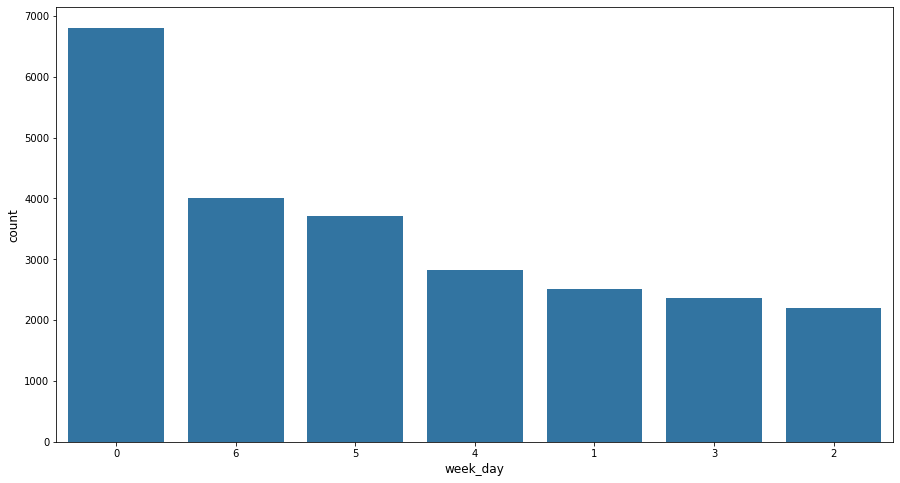

In [9]:
# df_train_x_current week_day 데이터 탐색
week_day_cnt1 = df_train_x_current.week_day.value_counts()

plt.figure(figsize=(15,8))
sns.barplot(week_day_cnt1.index, week_day_cnt1.values, alpha = 1, color=color[0])
plt.ylabel('count', fontsize=12)
plt.xlabel('week_day', fontsize=12)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


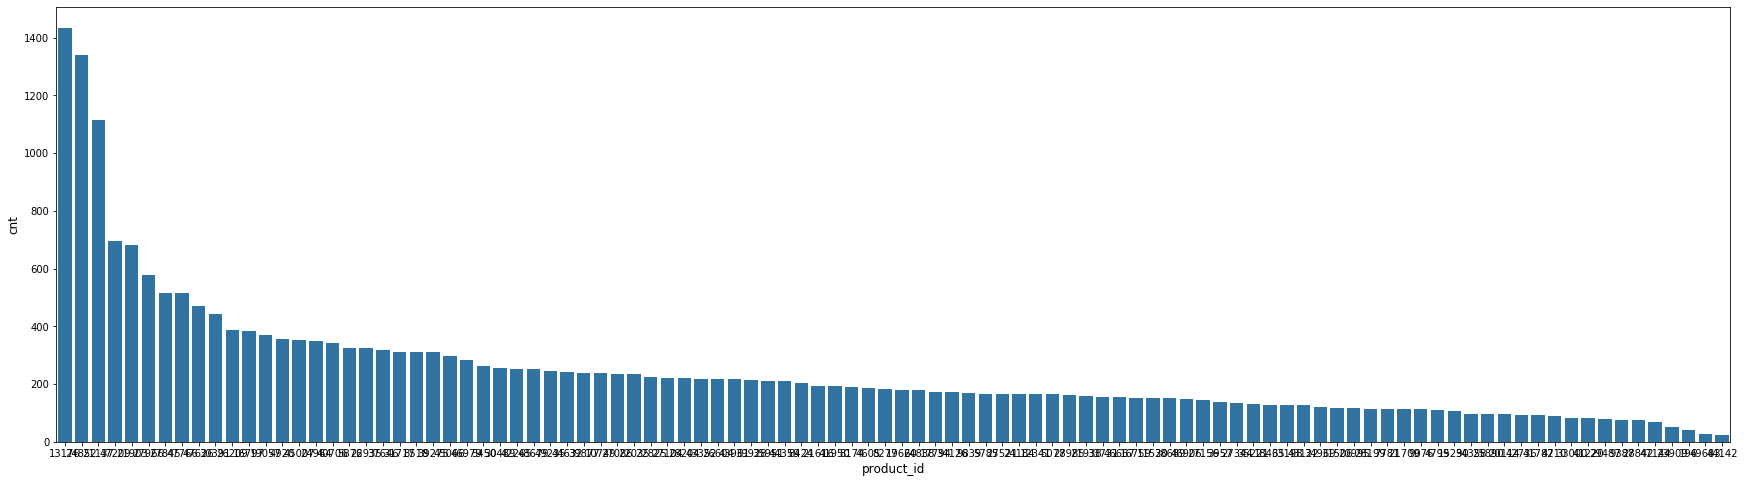

In [10]:
# df_train_y 탐색 상품 분류 갯수
df_train_y_cnt = df_train_y.product_id.value_counts()
# df_train_y_cnt.count()

plt.figure(figsize=(30,8))
sns.barplot(df_train_y_cnt.index, df_train_y_cnt.values, alpha = 1, color=color[0])
plt.ylabel('cnt', fontsize=12)
plt.xlabel('product_id', fontsize=12)
plt.show()

In [13]:
# train_x_current + train_y = 결합 단순 확인
# df_train_x_current 와 df_train_y 결합 
df_train_xy_cnt = pd.concat([df_train_x_current, df_train_y], axis = 1, sort = True)

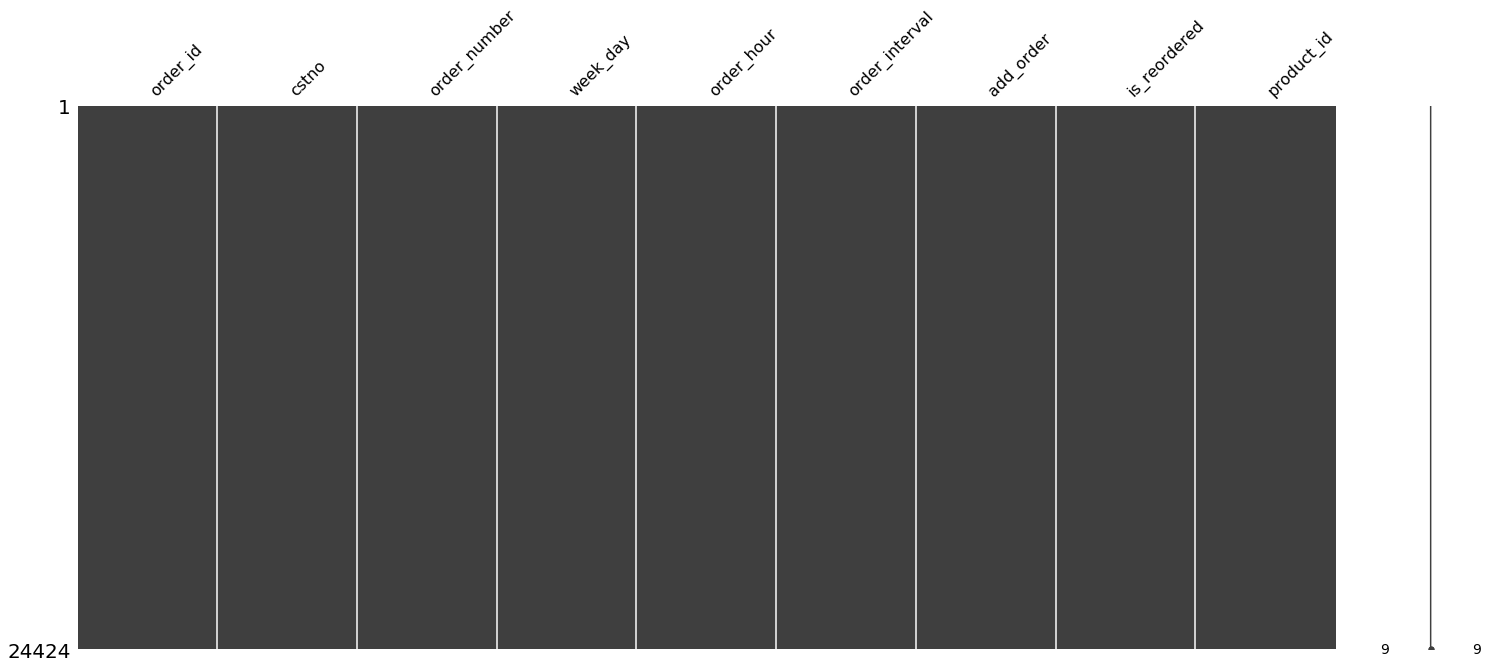

In [14]:
# 데이터 df_train_xy_cnt 탐색 결측치 확인
#df_train_y.isnull().sum()
msno.matrix(df_train_xy_cnt)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


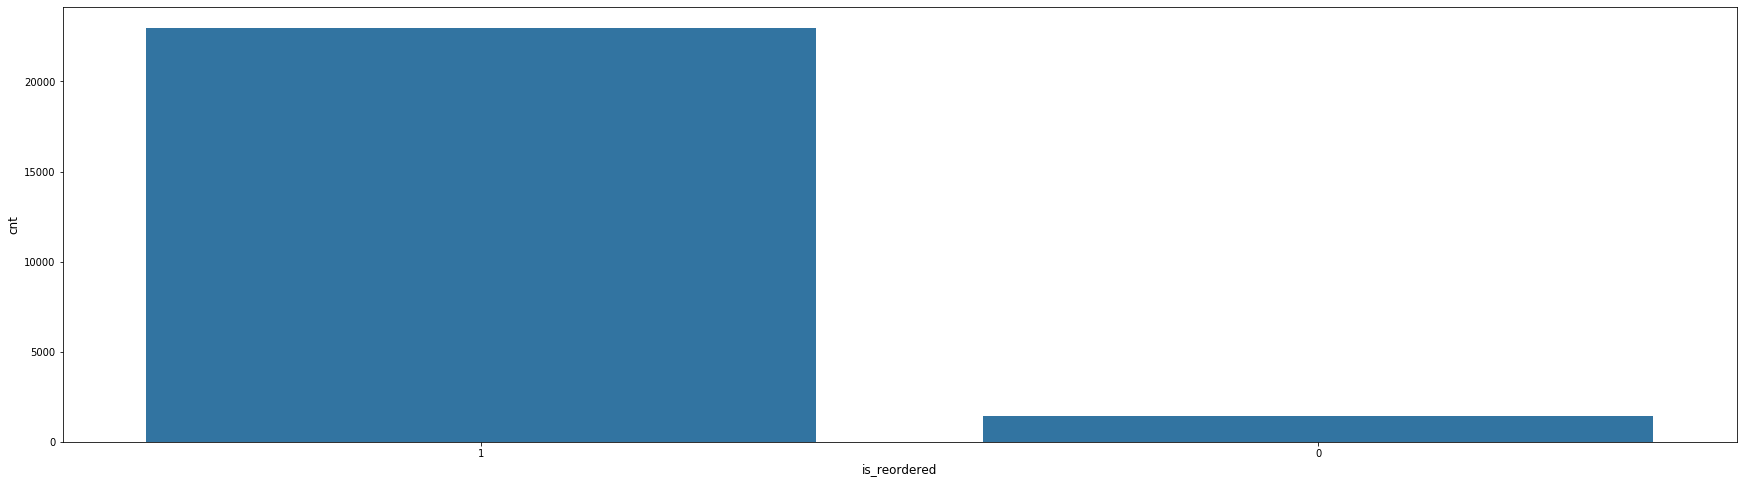

In [16]:
# df_train_xy_cnt 재주문 탐색
df_train_xy_reorder = df_train_xy_cnt.is_reordered.value_counts()
# df_train_y_cnt.count()

plt.figure(figsize=(30,8))
sns.barplot(df_train_xy_reorder.index, df_train_xy_reorder.values, alpha = 1, color=color[0])
plt.ylabel('cnt', fontsize=12)
plt.xlabel('is_reordered', fontsize=12)
plt.show()

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


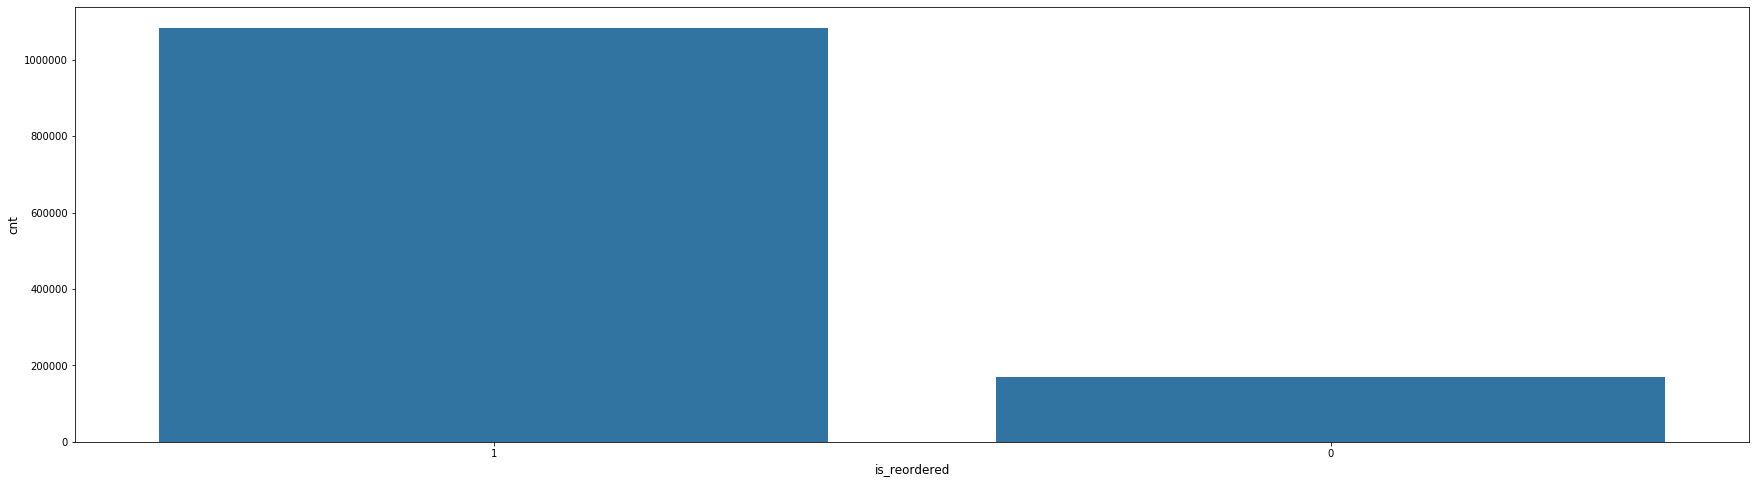

In [17]:
# df_train_x_past 재주문 탐색
df_train_x_past_reorder = df_train_x_past.is_reordered.value_counts()
# df_train_y_cnt.count()

plt.figure(figsize=(30,8))
sns.barplot(df_train_x_past_reorder.index, df_train_x_past_reorder.values, alpha = 1, color=color[0])
plt.ylabel('cnt', fontsize=12)
plt.xlabel('is_reordered', fontsize=12)
plt.show()

In [18]:
# 고객별 구매 패턴 분석1 - 총 고객수 확인
print(len(df_train_xy_cnt['cstno'].unique()))

5859


In [19]:
# 고객별 상품 분석1
cstno_unique = df_train_xy_cnt.groupby('cstno')['product_id'].nunique()
cstno_unique.describe()

count    5859.000000
mean        4.168629
std         2.859501
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        24.000000
Name: product_id, dtype: float64

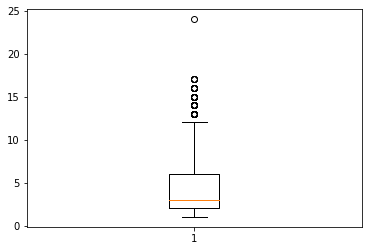

In [20]:
# 고객별 상품 분석2
plt.boxplot(cstno_unique.values)
plt.show()



In [22]:
# 구입한 총상품 갯수 확인
print(len(df_train_xy_cnt['product_id'].unique()))


100


In [23]:
# df_train_xy_cnt 가장 거래가 많은 상품 top 10 탐색
df_1 = df_train_xy_cnt.loc[:,['cstno','product_id']]
df_1 = df_1.groupby('product_id').agg(['count'])
df_1 = df_1.reset_index()
df_1.columns = ['product_id', 'count']
df_1.sort_values('count',ascending=False)[:10]

,product_id,count
3,13176,1435
25,24852,1340
14,21137,1115
80,47209,694
17,21903,683
36,27966,577
35,27845,517
82,47766,514
81,47626,471
42,30391,444


In [24]:
# df_train_x_past 가장 거래가 많은 상품 top 10 탐색
df_2 = df_train_x_past.loc[:,['cstno','product_id']]
df_2 = df_2.groupby('product_id').agg(['count'])
df_2 = df_2.reset_index()
df_2.columns = ['product_id', 'count']
df_2.sort_values('count',ascending=False)[:10]

,product_id,count
25,24852,74686
3,13176,67514
14,21137,52917
80,47209,42604
17,21903,40112
35,27845,29757
36,27966,28207
82,47766,25046
28,26209,21216
81,47626,21012


In [30]:
# df_1 : train_x_current 상품 순위 및 상품명 확인 
pd.merge(df_1,df_products_info, how = 'inner', on="product_id").sort_values('count',ascending=False)[:10]

,product_id,count,name,category_id,division_id,category_name,division_name
3,13176,1435,Bag of Organic Bananas,24,4,fresh fruits,produce
25,24852,1340,Banana,24,4,fresh fruits,produce
14,21137,1115,Organic Strawberries,24,4,fresh fruits,produce
80,47209,694,Organic Hass Avocado,24,4,fresh fruits,produce
17,21903,683,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
36,27966,577,Organic Raspberries,123,4,packaged vegetables fruits,produce
35,27845,517,Organic Whole Milk,84,16,milk,dairy eggs
82,47766,514,Organic Avocado,24,4,fresh fruits,produce
81,47626,471,Large Lemon,24,4,fresh fruits,produce
42,30391,444,Organic Cucumber,83,4,fresh vegetables,produce


In [31]:
# df_2 : train_x_past 상품 순위 및 상품명 확인 
pd.merge(df_2,df_products_info, how = 'inner', on="product_id").sort_values('count',ascending=False)[:10]

,product_id,count,name,category_id,division_id,category_name,division_name
25,24852,74686,Banana,24,4,fresh fruits,produce
3,13176,67514,Bag of Organic Bananas,24,4,fresh fruits,produce
14,21137,52917,Organic Strawberries,24,4,fresh fruits,produce
80,47209,42604,Organic Hass Avocado,24,4,fresh fruits,produce
17,21903,40112,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
35,27845,29757,Organic Whole Milk,84,16,milk,dairy eggs
36,27966,28207,Organic Raspberries,123,4,packaged vegetables fruits,produce
82,47766,25046,Organic Avocado,24,4,fresh fruits,produce
28,26209,21216,Limes,24,4,fresh fruits,produce
81,47626,21012,Large Lemon,24,4,fresh fruits,produce


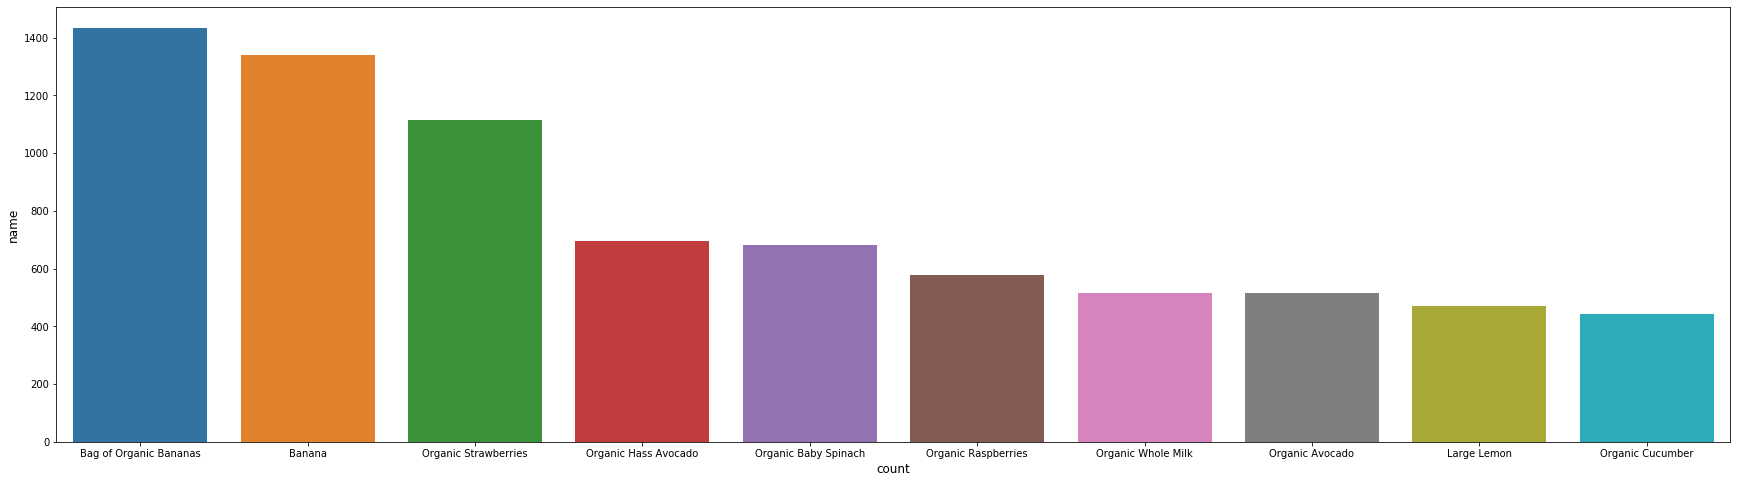

In [33]:
# df_train_x_current + df_train_y  = 탐색 상품 분류 갯수
df_plot_current = (pd.merge(df_1,df_products_info, how = 'inner', on="product_id").sort_values('count',ascending=False)[:10])[['name','count']]

plt.figure(figsize=(30,8))
sns.barplot(data=df_plot_current, x="name", y="count")
plt.ylabel('name', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.show()


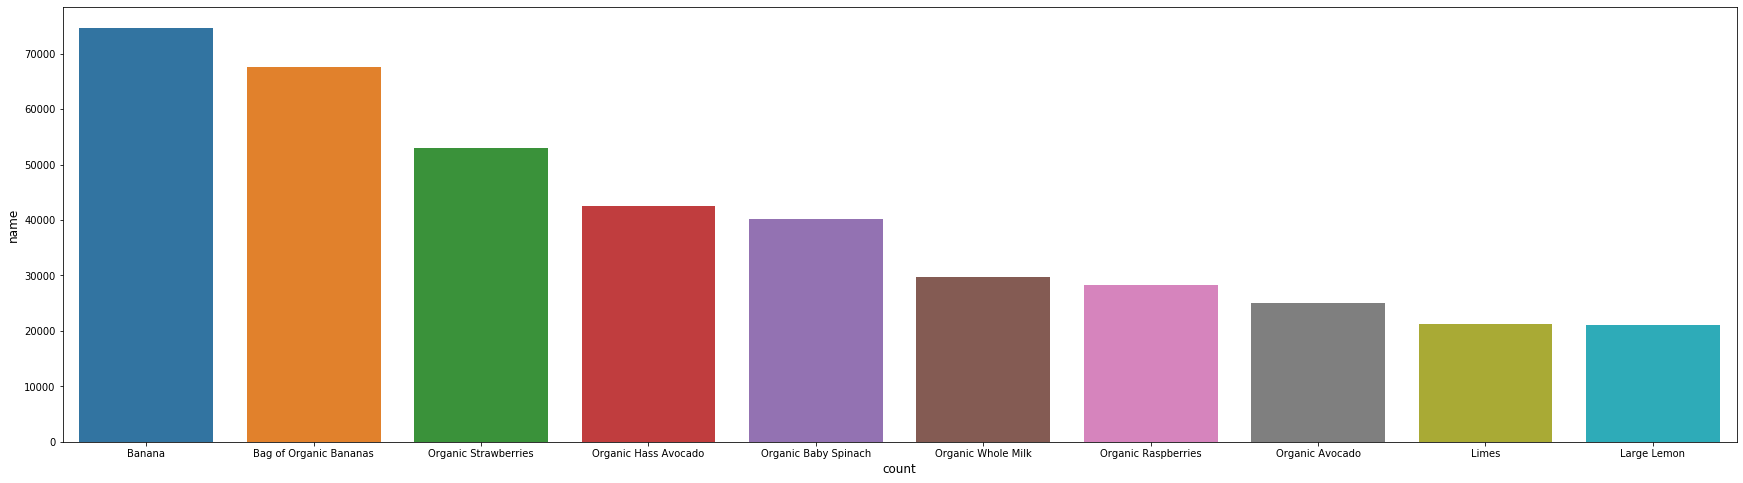

In [34]:
# df_plot_past 탐색 상품 분류 갯수
df_plot_past = (pd.merge(df_2,df_products_info, how = 'inner', on="product_id").sort_values('count',ascending=False)[:10])[['name','count']]


plt.figure(figsize=(30,8))
sns.barplot(data=df_plot_past, x="name", y="count")
plt.ylabel('name', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.show()

In [ ]:
""" 1차 탐색 결과 
df_1 : train_x_current + df_train_y = df_train_xy_cnt 
df_2 : train_x_past 


df_1(train_x_current) : week_day 기준 구매요일이 많은날은 : 0[일] <- 6[토] <- 5[금] <- 4[목] <- 1[월] <- 3[수] <- 2[화]
df_2(train_x_past) : week_day 기준 구매요일이 많은 날은   : 0[일] <- 1[월] <- 5[금] <- 6[토] <- 2[화] <- 4[목] <- 3[수]

df_1(train_x_current) : 구입한 상품이 제일 많은 순위 10 중 : 1위 Bag of Organic Bananas / 2위 Bananas / 3위 Organic Strawberries
df_2(train_x_past)    : 구입한 상품이 제일 많은 순위 10 중 : 1위 Bananas / 2위 Bag of Organic Bananas / 3위 Organic Strawberries

df_1(train_x_current) : 직전 구매후 경과일수 순위 : 7일 <- 6일 <- 5일 
df_2(train_x_past)    : 7일 <- 4일 <- 3일


"""

/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/envs/python3.6/lib/python3.6/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.800000000000253, 'order_hour')

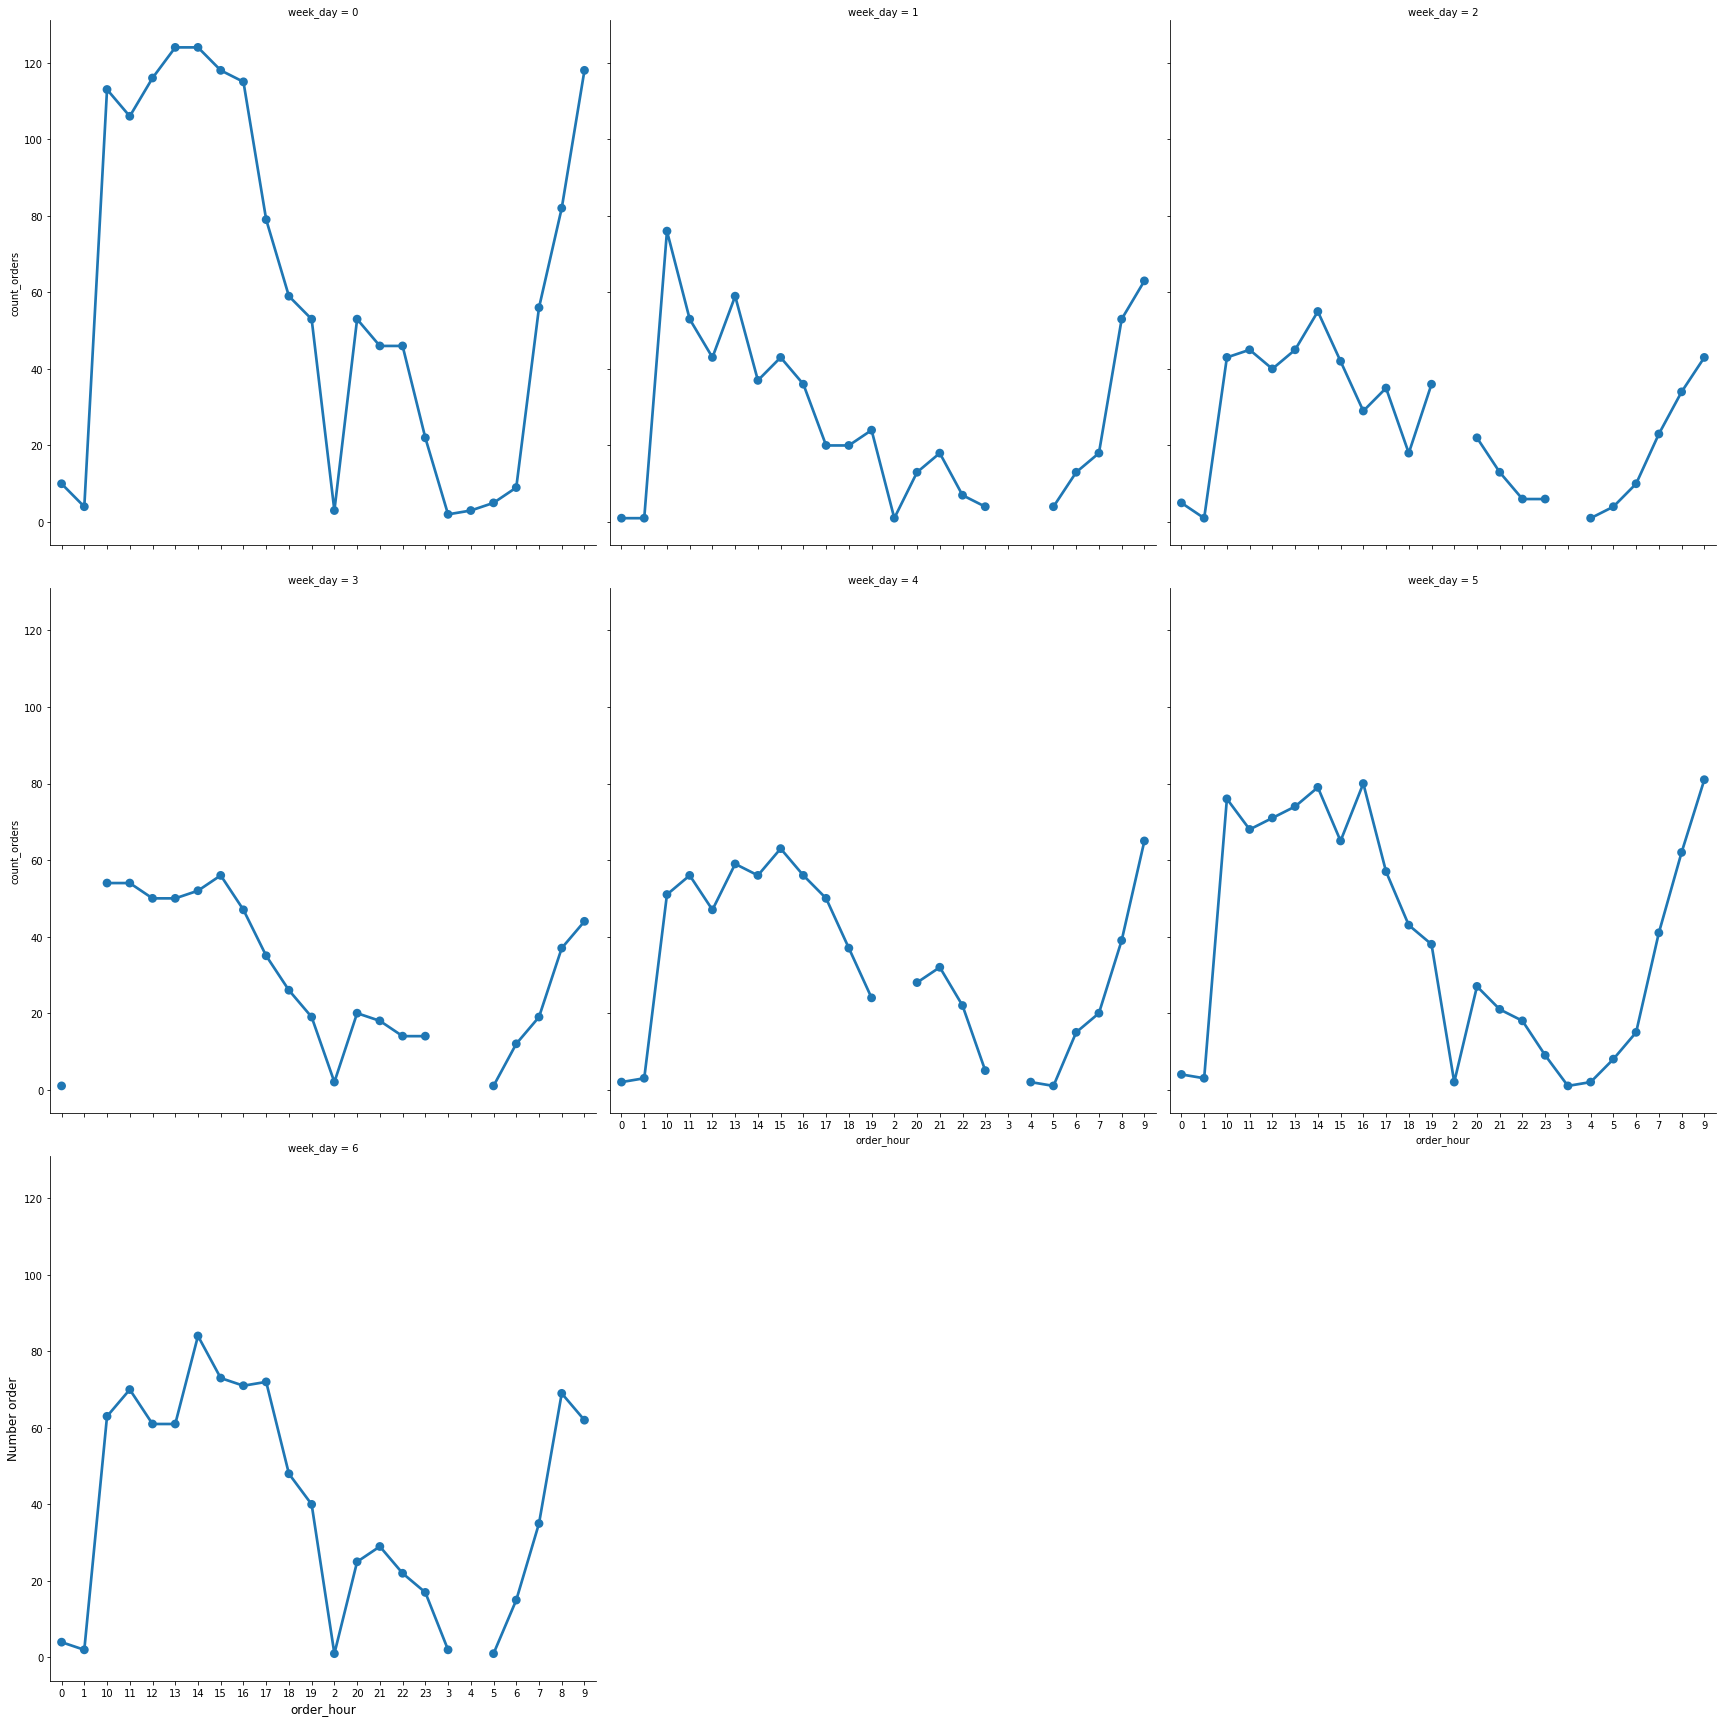

In [81]:

df_week_tmp = pd.DataFrame(df_train_xy_cnt.groupby(['week_day','order_hour']).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'count_orders'})).reset_index()
df_week_tmp = df_week_tmp.sort_values(['week_day','order_hour'],ascending=True)

plt.close('all')
sns.factorplot(x="order_hour", y="count_orders", col="week_day", data=df_week_tmp, color=color[0], col_wrap=3, size=8)
plt.ylabel('Number order', fontsize=12)
plt.xlabel('order_hour', fontsize=12)



In [82]:
df_week_tmp

,week_day,order_hour,count_orders
0,0,0,10
24,1,0,1
46,2,0,5
68,3,0,1
89,4,0,2
...,...,...,...
67,2,9,43
88,3,9,44
110,4,9,65
134,5,9,81


In [43]:
df_train_xy_cnt

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
0,806422,41116,47,5,18,3.0,4,1,21709
1,2146033,127113,45,1,10,7.0,24,1,21709
2,3055498,140168,45,5,10,26.0,11,1,21709
3,3267527,60604,52,0,16,8.0,2,1,21709
4,3125992,136554,46,4,9,5.0,2,0,21709
...,...,...,...,...,...,...,...,...,...
24419,3184000,174046,100,5,7,2.0,12,1,24852
24420,1754722,6710,100,5,11,3.0,21,1,24852
24421,1076973,150840,100,0,13,0.0,18,1,24852
24422,1247049,99707,100,1,13,3.0,6,1,24852
